# Исследование надежности заемщиков

Это первая часть проекта, она будет проверена автоматически. Вторую часть проверит ревьюер. 

## 1. Откройте таблицу и изучите общую информацию о данных

Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную data. Путь к файлу:

/datasets/data.csv

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('C:/Users/Marat_Yangurov/Jup_Notebook_Practicum/data.csv')

Задание 2. Выведите первые 20 строчек датафрейма data на экран.

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Задание 3. Выведите основную информацию о датафрейме с помощью метода info().

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## 2. Предобработка данных

### 2.1 Удаление пропусков

Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Задание 5. В двух столбцах есть пропущенные значения. Один из них — days_employed. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — total_income — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца income_type. Например, у человека с типом занятости сотрудник пропуск в столбце total_income должен быть заполнен медианным доходом среди всех записей с тем же типом.

In [6]:
for d in data['income_type']:
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых в income_type текущий тип дохода (d) и есть пропуски в total_income 
    data.loc[(data['income_type'] == d) & (data['total_income'].isna()), 'total_income'] = data.loc[(data['income_type'] == d), 'total_income'].median()
    # и записываем в них медианное значение total_income среди строк с текущим типом дохода (d)
data.head(20)


# Второй вариант решения:
# data['total_income'] = data['total_income'].fillna(data.groupby('income_type')['total_income'].transform("median"))
# data.head(20)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


### 2.2 Обработка аномальных значений

Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце days_employed. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода abs().

In [7]:
data['days_employed'] = data['days_employed'].abs()
data['days_employed'].head(20)

0       8437.673028
1       4024.803754
2       5623.422610
3       4124.747207
4     340266.072047
5        926.185831
6       2879.202052
7        152.779569
8       6929.865299
9       2188.756445
10      4171.483647
11       792.701887
12              NaN
13      1846.641941
14      1844.956182
15       972.364419
16      1719.934226
17      2369.999720
18    400281.136913
19     10038.818549
Name: days_employed, dtype: float64

Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа days_employed в днях.

In [8]:
data.groupby('income_type')['days_employed'].median()

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

Задание 8. Выведите перечень уникальных значений столбца children.

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

Задание 9. В столбце children есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма data.

In [10]:
data = data.loc[data['children'] != -1]
data = data.loc[data['children'] != 20]

Задание 10. Ещё раз выведите перечень уникальных значений столбца children, чтобы убедиться, что артефакты удалены.

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### 2.3 Удаление пропусков (продолжение)

Задание 11. Заполните пропуски в столбце days_employed медианными значениями по каждому типу занятости income_type.

In [12]:
for d in data['income_type']:
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых в income_type текущий тип дохода (d) и есть пропуски в total_income 
    data.loc[(data['income_type'] == d) & (data['days_employed'].isna()), 'days_employed'] = data.loc[(data['income_type'] == d), 'days_employed'].median()
    # и записываем в них медианное значение total_income среди строк с текущим типом дохода (d)
data.head(20)


# Второй вариант решения:
# data['days_employed'] = data['days_employed'].fillna(data.groupby('income_type')['days_employed'].transform("median"))
# data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### 2.4 Изменение типов данных

Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.

In [14]:
data['total_income'] = data['total_income'].astype('int')
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем
7,0,152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823,образование
8,2,6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи


### 2.5 Обработка дубликатов

Задание 14. Обработайте неявные дубликаты в столбце education. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.

In [15]:
data['education'] = data['education'].str.lower()
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи


Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их. Сбрасывать индексы после удаления строк дубликатов с помощью reset_index(drop=True) здесь не требуется.

In [16]:
data.duplicated().sum()

71

In [17]:
data.drop_duplicates(keep='first')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля


### 2.6 Категоризация данных

Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.

In [18]:
def categorize_income(row):
    total_income = row['total_income']
    if total_income < 30000:
        return 'E'
    elif 30001 <= total_income <= 50000:
        return 'D'
    elif 50001 <= total_income <= 200000:
        return 'C'
    elif 200001 <= total_income <= 1000000:
        return 'B'
    elif 1000001 <= total_income:
        return 'A'

data['total_income_category'] = data.apply(categorize_income, axis=1)
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,C
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,C


Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца purpose.

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Задание 18. Создайте функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

Например, если в столбце purpose находится подстрока 'на покупку автомобиля', то в столбце purpose_category должна появиться строка 'операции с автомобилем'.

Используйте собственную функцию с именем categorize_purpose() и метод apply(). Изучите данные в столбце purpose и определите, какие подстроки помогут вам правильно определить категорию.

In [20]:
def categorize_purpose(row):
    purpose = row['purpose']
    if 'авто' in purpose:
        return 'операции с автомобилем'
    elif 'жиль' in purpose:
        return 'операции с недвижимостью'
    elif 'свадьб' in purpose:
        return 'проведение свадьбы'
    else:
        return 'получение образования'

data['purpose_category'] = data.apply(categorize_purpose, axis=1)
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


# Вторая часть

## 3. Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [21]:
data['debt'].unique()

array([0, 1], dtype=int64)

В колонке **'debt'**, мы имеем 2 категории задолженности по возврату кредитов, где:

1 - Задолжность была
0 - Задолжности не было

Для начала найдем общую вероятность задолженности по всему датафрейму. Для этого возьмём все задолженности и разделим их на общее количество заемов. Это позволит нам в будущем сравнивать данные и видеть, какие категории с большей вероятностью задерживают платежи.

In [64]:
total_debt_v= data['debt'].sum() / data['debt'].count()
total_debt_v *100

8.09270161667134

Вероятность задолженности по всему датафрему 8.09%.

Теперь.

Получим количество задолжностей для каждой из групп датафрейма. Выясним сколько человек в каждой группе и посчитаем вероятность возврата кредита в зависимости от количества детей. В конце обьеденим все данные в одну таблицу.

In [78]:
import numpy as np
child_sum = data.groupby('children')['debt'].sum()

child_count = data.groupby('children')['debt'].count()

child_mean = (child_sum / child_count)*100

#child_final = pd.concat((child_sum, child_count, child_mean), axis = 1)
#print(child_final)

child_final = data.pivot_table(index=['children'], values='debt', aggfunc=['sum', 'count', 'mean']).reset_index().droplevel(1, axis=1)
child_final['mean'] = child_final['mean']*100
child_final

,children,sum,count,mean
0,0,1063,14149,7.512898
1,1,444,4818,9.215442
2,2,194,2055,9.440389
3,3,27,330,8.181818
4,4,4,41,9.756098
5,5,0,9,0.000000


**Вывод**: Из обработанных данных мы видим, что вероятность не возврята кретита у семей, где дети отсутствуют (0). Самая маленькая, всего (7.5%).
Хуже дела обстоят в семьях с одним и двумя детьми (9.2%) и (9.44%).
Выборка по семьям с детьит от 3 и выше, слишком мала.

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

Выполним теже операции, что и выше. Получим количество задолжностей для каждой из групп датафрейма. Выясним сколько человек в каждой группе и посчитаем вероятность возврата кредита в зависимости от семейного положения. В конце обьеденим все данные в одну таблицу.

In [58]:
fam_final = data.pivot_table(index=['family_status', 'family_status_id'], values='debt', aggfunc=['sum', 'count', 'mean']).reset_index().droplevel(1, axis=1)
fam_final['mean'] = fam_final['mean']*100
fam_final

,family_status,family_status_id,sum,count,mean
0,Не женат / не замужем,4,273,2799,9.753483
1,в разводе,3,84,1189,7.064760
2,вдовец / вдова,2,63,952,6.617647
3,гражданский брак,1,385,4160,9.254808
4,женат / замужем,0,927,12302,7.535360


**Вывод**: Из обработанных данных мы видим, что лучше всех отдают кредит  вдовцы/вдовы – 6.6%, люди в разводе – 7.06% и женатые/замужние пары – 7.5%. Самые худшие показатели у групп в гражданском браке – 9.25% и не женатых/не замужних групп – 9.75%. 

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

Выполним теже операции, что и выше. Получим количество задолжностей для каждой из групп датафрейма. Выясним сколько человек в каждой группе и посчитаем вероятность возврата кредита в зависимости от уровня дохода. В конце обьеденим все данные в одну таблицу.

In [61]:
income_final = data.pivot_table(index = ['total_income_category'], values = 'debt', aggfunc = ['sum', 'count', 'mean']).reset_index().droplevel(1, axis=1)
income_final['mean'] = income_final['mean']*100
income_final

,total_income_category,sum,count,mean
0,A,2,25,8.000000
1,B,354,5014,7.060231
2,C,1353,15992,8.460480
3,D,21,349,6.017192
4,E,2,22,9.090909


**Вывод**: Категории A, D и E слишком малы. Нет возможности дать ответ по столь малой выборке. 

Группа B- люди с доходом 200_000–1_000_000 руб. Это самые надежные заемщики, с процентом невозврата 7.06%.

Группа С- люди с доходом 50_000–200_000 руб. Имеют процент невозврата 8.46%.

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

Выполним теже операции, что и выше. Получим количество задолжностей для каждой из групп датафрейма. Выясним сколько человек в каждой группе и посчитаем вероятность возврата кредита в зависимости от цели кредита. В конце обьеденим все данные в одну таблицу.

In [62]:
purpose_final = data.pivot_table(index = ['purpose_category'], values = 'debt', aggfunc = ['sum', 'count', 'mean']).reset_index().droplevel(1, axis=1)
purpose_final['mean'] = purpose_final['mean']*100
purpose_final

,purpose_category,sum,count,mean
0,операции с автомобилем,400,4288,9.328358
1,операции с недвижимостью,308,4450,6.921348
2,получение образования,841,10327,8.143701
3,проведение свадьбы,183,2337,7.830552


**Вывод**: Можем сделать вывод, что люди берущие кредит на покупку квартиры, а также на проведение свадьбы, чаще всего отдают кредит. Причина этого может быть в том, что при взятии даных кредитов, в погашении учавствуют двое человек муж и жена. Хуже обстоят дела с кредитом на получение образования. Ввиду того, что получение образования не гарантирует высокооплачиваемое трудоустройство. Самым худшим показателем обладает покупка автомобиля.

Резюмируя вспомним наше среднее значение по всему датафрейму： 8.09%. Можно сказать, что все категории с более высокой вероятностью задолженности могут считаться менее ответственными заемщиками, в эту категорию входят:

**1) Семьи с 1 и более детьми**

**2) Люди незамужние либо живующие в гражданском браке**

**3) Люди с уровнем достатка С и Е**

**4) Люди берущие кредит на образование или получение автомобиля**


**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

Ответ: Пропуски могли появиться из-за человеческого фактора. Работники банка, неверно заполнили таблицу, либо пропускали ячейки.

**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

Ответ: Заполнение пропусков медианным значением лучшее решение для количественных переменных, потому что эти значения не создатут перекосов в общем обьеме данных и не искозят реальные показатели. 

## 4. Общий вывод

Мы выполнили анализ данных. Проверили датафрейм на наличие пропусков и заполнили их. Исправили все ошибки в данных, а в конце провели исследование, которое показало как семейное положение, наличие детей, доход и цель кредита влияют на возрат всредств в срок. 

**Есть ли зависимость между количеством детей и возвратом кредита в срок?**
Да, мы можем судить только о семьях с количеством детей до двух, далее выборка нерелевантна. Люди без детей реже задалживают банку ( только в 7.5%) в то время как люди с одним или двумя детьми чаще остаются в долгах (9.2% и 9.4% соответственно). 

**Есть ли зависимость между семейным положением и возвратом кредита в срок?**
Да, исследование показало, что люди недавно потерявшие супруга или люди в разводе с большей вероятностью возвращают деньги и остаются должны только в 6.6% и 7.06% случаев соответственно. Далее следуют люди в браке, а чаще всего кредиты не возвращают одинокие люди (9.75%)

**Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**
Обстоятельно можно говорить только про две категории людей -- это люди с доходом категории В и С т.к. остальная выборка слишком маленькая. Люди с доходом 200 тыс. - 1м рублей более добросовествные плательщики (только 7.06% долгов) в то время как люди с доходом от 50-100тыс. не выплачивают кредит в 8.04% случаев.

**Как разные цели кредита влияют на его возврат в срок?**
По результатам исследования чаще в срок кредит возвращают люди взявшие его на операции с недвижимостью (6.92% задолженностьей), после идут люди взявшие кредит на свадьбу (7.8% задолженностей), далле получение образование (8.14%) и реже всего возвращают кредит люди взявшие его на покупку автомобиля (9.32%)

**Далее приведем всю информацию в графиках**

Информация от 1 до 10 в столбце **mean** - вероятность невозврата кредита, в других столбцах - категория выборки.


Для категоризации по количеству детей


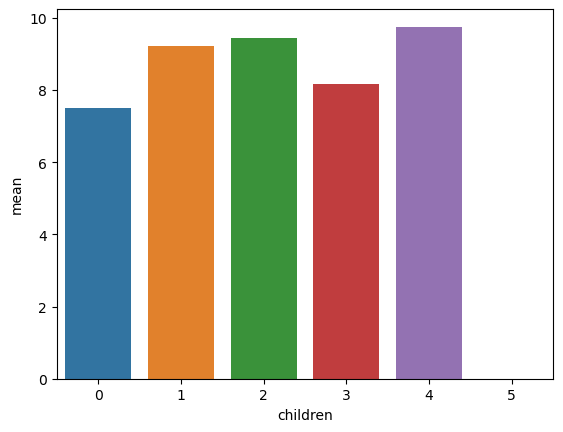

In [82]:
import seaborn
seaborn.barplot(x=child_final['children'], y=child_final['mean'], data = child_final)
print('Для категоризации по количеству детей')

Для категоризации между семейным положением и возвратом кредита в срок


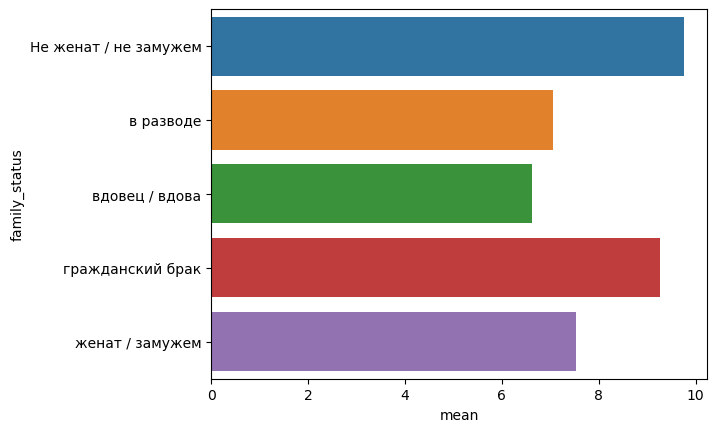

In [84]:
import seaborn
seaborn.barplot(x=fam_final['mean'], y=fam_final['family_status'], data = fam_final)
print('Для категоризации между семейным положением и возвратом кредита в срок')

Для категоризации между уровнем дохода и возвратом кредита в срок


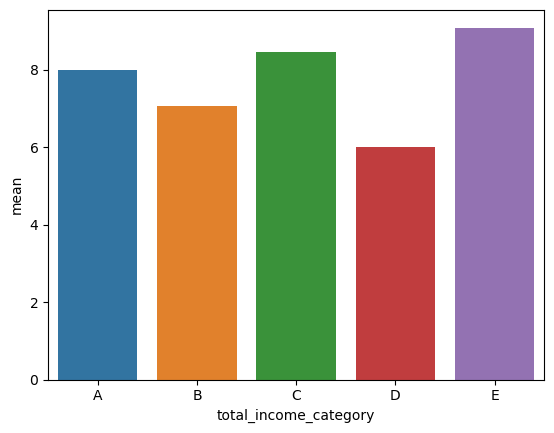

In [85]:
import seaborn
seaborn.barplot(x=income_final['total_income_category'], y=income_final['mean'], data = income_final)
print('Для категоризации между уровнем дохода и возвратом кредита в срок')

Для категоризации между разными целями кредита и возвратом кредита в срок


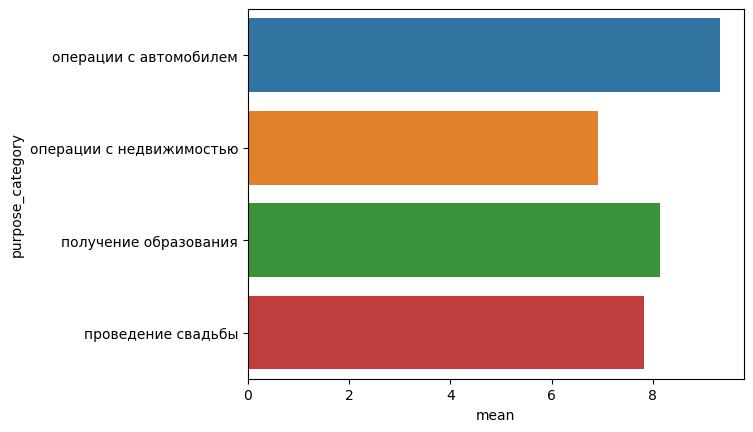

In [87]:
import seaborn
seaborn.barplot(x=purpose_final['mean'], y=purpose_final['purpose_category'], data = purpose_final)
print('Для категоризации между разными целями кредита и возвратом кредита в срок')

Рекомендации:

1) Пристальнее относиться к категориям, параметр mean которых больше 8.09%.

2) Возможно, создать бота, который будет проверять человека по всем категориям и выносить общую вероятность для всех данных. Так мы сможем более точно определить вероятность невозврата денег.

3) Ужесточить условия для более рискованных групп, например тщательнее проверять людей берущих деньги на покупку автомобиля.